# 1 repeat the code of machining learning

## get basic data, built basic setting functions

In [7]:
from sklearn.datasets import load_boston

In [8]:
data = load_boston()

In [9]:
X,y = data['data'], data['target']

In [10]:
%matplotlib inline

In [11]:
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

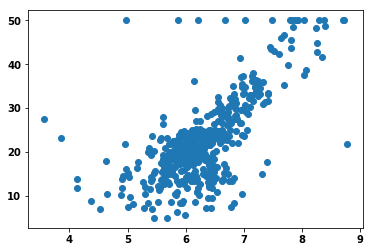

In [12]:
import matplotlib.pyplot as plt
draw_rm_and_price()

In [13]:
import random

In [14]:
def price(rm, k, b):
    return k*rm + b

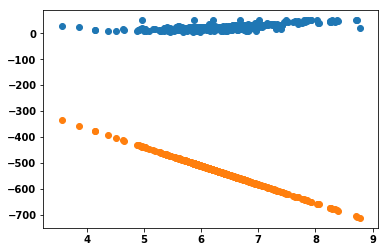

In [15]:
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

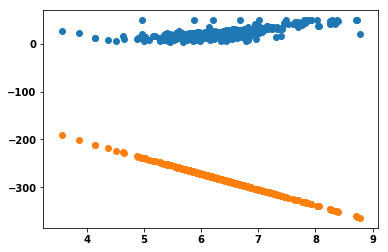

In [16]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [17]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## 1.1 Random Choose Method to get optimal k* and *b

In [20]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None
for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y,price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('when time is : {}, get best_k : {} and best_b {}, and the loss is :{}'.format(i, best_k,best_b, min_loss))

when time is : 0, get best_k : 64.64645834488351 and best_b 71.28414847931083, and the loss is :208616.5868663532
when time is : 1, get best_k : -35.193772798707485 and best_b -52.46614531739593, and the loss is :88732.2985094204
when time is : 3, get best_k : 55.638386503712724 and best_b -68.80470564983699, and the loss is :67844.67523252606
when time is : 8, get best_k : 42.669029614002454 and best_b -61.380612633681174, and the loss is :34545.26559988393
when time is : 10, get best_k : -7.8485123644117465 and best_b -11.831748894582802, and the loss is :7189.110287631182
when time is : 38, get best_k : 5.652654931265658 and best_b 44.040044904804006, and the loss is :3302.1243597882303
when time is : 43, get best_k : 8.922616612150463 and best_b -62.55157765190662, and the loss is :885.1385520268466
when time is : 79, get best_k : 3.071048415679641 and best_b -21.36657834689973, and the loss is :666.6309317291782
when time is : 88, get best_k : 17.177650057261843 and best_b -65.485

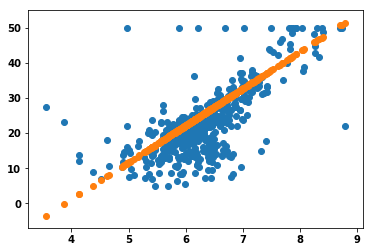

In [21]:
k = 10.521611553508919
b =  -40.94949943741939
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 1.2 Supervised Direction to get optimal k* and *b

In [23]:
trying_times = 2000
min_loss = float('inf')

best_k = random.random()*200 - 100
best_b = random.random()*200 - 100
direction = [(+1,+1),
             (-1,-1),
             (+1,-1),
             (-1,+1)
            ]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction*scalar
    price_by_k_and_b = [price(rm, current_k , current_b) for rm in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        if i % 50 == 0:
            print('when time is : {}, get best_k:{} best_b {}, and the loss is {}'.format(i, best_k, best_b, min_loss))
        
    else:
        next_direction = random.choice(direction)

when time is : 0, get best_k:-55.642586014287055 best_b 62.40312928357263, and the loss is 98099.20054022332
when time is : 50, get best_k:-50.742586014286985 best_b 67.30312928357246, and the loss is 76954.44585376323
when time is : 100, get best_k:-45.742586014286914 best_b 72.30312928357218, and the loss is 58029.315933446094
when time is : 150, get best_k:-40.74258601428684 best_b 77.30312928357189, and the loss is 41782.115681804884
when time is : 200, get best_k:-35.74258601428677 best_b 82.30312928357161, and the loss is 28212.84509883962
when time is : 250, get best_k:-30.7425860142867 best_b 87.30312928357132, and the loss is 17321.504184550264
when time is : 300, get best_k:-25.74258601428663 best_b 92.30312928357104, and the loss is 9108.092938936843
when time is : 350, get best_k:-20.74258601428656 best_b 97.30312928357075, and the loss is 3572.611361999305
when time is : 400, get best_k:-15.742586014286493 best_b 102.30312928357047, and the loss is 715.0594537376974
when t

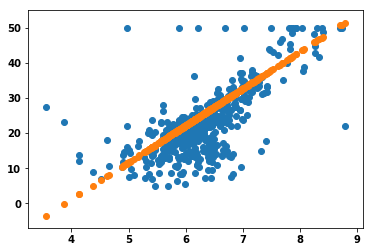

In [25]:
k = -12.842586014286503
b = 104.60312928357034
price_by_best_k_annd_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 1.3 Gradient Descent to get optimal k* and *b

In [26]:
def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)*x_i
    return -2/n*gradient



In [27]:
def partial_b(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2/n*gradient

In [28]:
trying_times = 2000
X,y = data['data'], data['target']
min_loss = float('inf')
current_k = random.random()*200 - 100
current_b = random.random()*200 - 100
learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k, current_b) for r in X_rm]
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 50 == 0:
            print('when time is : {}, get best_k:{} best_b {}, and the loss is {}'.format(i, current_k, current_b, min_loss))
    k_gradient = partial_k(X_rm,y,price_by_k_and_b)
    b_gradient = partial_b(X_rm,y,price_by_k_and_b)
    current_k = current_k + (-1*k_gradient)*learning_rate
    current_b = current_b + (-1*b_gradient)*learning_rate

when time is : 0, get best_k:-81.86200646023514 best_b -70.2990912478667, and the loss is 372939.36487749993
when time is : 50, get best_k:-50.07475257204059 best_b -65.2994094859213, and the loss is 163802.37238019222
when time is : 100, get best_k:-29.01007243247172 best_b -61.985370985657696, and the loss is 71960.64403217842
when time is : 150, get best_k:-15.051039385350794 best_b -59.788376540000954, and the loss is 31628.691996404068
when time is : 200, get best_k:-5.800784447703818 best_b -58.33162619341462, and the loss is 13917.065469860949
when time is : 250, get best_k:0.3290521863635091 best_b -57.365421731887686, and the loss is 6139.070241712615
when time is : 300, get best_k:4.3910465612241545 best_b -56.724292864976434, and the loss is 2723.392025066694
when time is : 350, get best_k:7.082720941717238 best_b -56.298585556391416, and the loss is 1223.4089996527039
when time is : 400, get best_k:8.866310158804968 best_b -56.015634147282334, and the loss is 564.6963487794

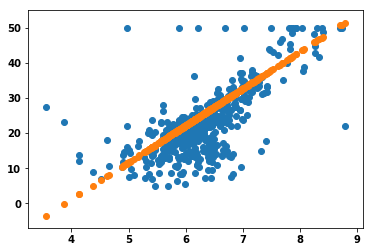

In [29]:
k = 12.35886759767083
b = -55.38731261770088
price_by_best_k_annd_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 1.4 Try different Loss function and learning rate.

In [47]:
def partial_k_2(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i> y_hat_i:
            gradient += (-x_i)
        else:
            gradient += x_i
    return 1/n*gradient


In [48]:
def partial_b_2(y,y_hat):
    n = len(y)
    gradient = 0
    for  y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i> y_hat_i:
            gradient += -1
        else:
            gradient += 1
    return 1/n*gradient

In [49]:
trying_times = 2000
X,y = data['data'], data['target']
min_loss = float('inf')
current_k = random.random()*200 - 100
current_b = random.random()*200 - 100
learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k, current_b) for r in X_rm]
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 50 == 0:
            print('when time is : {}, get best_k:{} best_b {}, and the loss is {}'.format(i, current_k, current_b, min_loss))
    k_gradient = partial_k_2(X_rm,y,price_by_k_and_b)
    b_gradient = partial_b_2(y,price_by_k_and_b)
    current_k = current_k + (-1*k_gradient)*learning_rate
    current_b = current_b + (-1*b_gradient)*learning_rate

when time is : 0, get best_k:-83.59106209879583 best_b 24.64827516063481, and the loss is 278039.9887921593
when time is : 50, get best_k:-83.55963892685934 best_b 24.6532751606348, and the loss is 277825.27211721044
when time is : 100, get best_k:-83.52821575492284 best_b 24.658275160634787, and the loss is 277610.6384141013
when time is : 150, get best_k:-83.49679258298634 best_b 24.663275160634775, and the loss is 277396.0876828315
when time is : 200, get best_k:-83.46536941104985 best_b 24.668275160634764, and the loss is 277181.61992340145
when time is : 250, get best_k:-83.43394623911335 best_b 24.673275160634752, and the loss is 276967.2351358113
when time is : 300, get best_k:-83.40252306717686 best_b 24.67827516063474, and the loss is 276752.93332006014
when time is : 350, get best_k:-83.37109989524036 best_b 24.68327516063473, and the loss is 276538.71447614924
when time is : 400, get best_k:-83.33967672330387 best_b 24.688275160634717, and the loss is 276324.578604077
when t

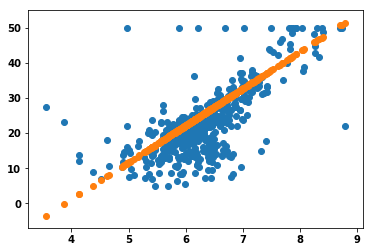

In [50]:
k = -82.36555839327251
b = 24.843275160634356
price_by_best_k_annd_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

the loss is much bigger than previous loss

## try bigger learning rate

In [52]:
trying_times = 2000
X,y = data['data'], data['target']
min_loss = float('inf')
current_k = random.random()*200 - 100
current_b = random.random()*200 - 100
learning_rate = 1e-02


update_time = 0

for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k, current_b) for r in X_rm]
    current_loss = loss(y,price_by_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 50 == 0:
            print('when time is : {}, get best_k:{} best_b {}, and the loss is {}'.format(i, current_k, current_b, min_loss))
    k_gradient = partial_k(X_rm,y,price_by_k_and_b)
    b_gradient = partial_b(X_rm,y,price_by_k_and_b)
    current_k = current_k + (-1*k_gradient)*learning_rate
    current_b = current_b + (-1*b_gradient)*learning_rate

when time is : 0, get best_k:65.85945792735905 best_b -53.602293659822784, and the loss is 115717.66081499311
when time is : 50, get best_k:13.3242490612459 best_b -61.528152079134614, and the loss is 52.487846987632565
when time is : 100, get best_k:13.273781622434841 best_b -61.20712274521116, and the loss is 52.276656248069095
when time is : 150, get best_k:13.223917423291777 best_b -60.88993069000396, and the loss is 52.07048408022977
when time is : 200, get best_k:13.174649253264612 best_b -60.576530046340196, and the loss is 51.86921122669732
when time is : 250, get best_k:13.125969987989313 best_b -60.266875495299516, and the loss is 51.672721263994546
when time is : 300, get best_k:13.077872588259696 best_b -59.960922259660684, and the loss is 51.48090053524088
when time is : 350, get best_k:13.030350099009551 best_b -59.658626097426776, and the loss is 51.293638084408855
when time is : 400, get best_k:12.983395648306896 best_b -59.35994329542749, and the loss is 51.11082559214

larger learning rate make it change more fast

#  2. Answer following questions:

1. Why do we need machine learning methods instead of creating a complicated formula?

## Ans:Some problem is complex with a large amount of data and lots of variables. It might hard to show the rules by formula while machine learning would be the best approach.

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

## Ans: It need a large memory and calculate time. And we are still not sure which one is best.

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

## Ans: Yes. It save more time. However, if it can only give the local best value. 

4. Why do we use Derivative / Gredient to fit a target function?

## Ans: It can tell us the right direction of parameter change to supervise the model setting process.

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

## Ans: Gredient is the how much we change every time. Descent means that we always choose the good direction that can make the loss become smaller. If loss increase, we went to same direction. Otherwise, we went to the other direction.

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

## Ans: It can get the best one more quick as we can use patial to contrrol the directipn.

7. Using the simple words to describe: What's the machine leanring?

## Ans: building models from sample data in order to automate decision-making processes based on data inputs

# 3. Finish the search problem

In [3]:
import requests

In [4]:
import pandas as pd
import numpy as np

#  Get data from web page.

In [6]:
#get geo location
#method 1
url_1 = 'https://www.cnblogs.com/tianlin106/p/7007511.html'
geo_location = requests.get(url_1).content.decode('utf-8')

In [7]:
import re
#names of stations
stops = re.findall(r's1">([\u4e00-\u9fff]+)<span', geo_location)
len(stops)

250

In [648]:
# this wen is not complex.
len(list(set(stops)))

173

In [629]:
#geo 1
want_area_2 = r'<span class="s2">,([\d.]+),'
pattern_2 = re.compile(want_area_2)
location_geos = pattern_2.findall(geo_location)
location_geos = [float(j) for j in location_geos]
len(location_geos)

250

In [630]:
#geo 2
want_area_3= r',[\d.]+,([\d.]+)|<span class="s1">'
pattern_3 = re.compile(want_area_3)
location_geos_2 = pattern_3.findall(geo_location)
len(location_geos_2)
location_geos_real = [float(i) for i in location_geos_2 if len(i) != 0]
del location_geos_real[0:2]
len(location_geos_real)

250

# Preprocessing data from page source

In [631]:
#make a dictionary
location_geo_station = dict(zip(stops,zip(location_geos,location_geos_real)))

In [647]:
len(location_geo_station)

173

#  Get data from web page.

In [614]:
#method 2,I do not know how to write the pattern
pattern_all = re.compile(r"<span class=\"s1\">([\u4e00-\u9fff]+)<span class=\"s2\">,\s+(\d+.\d+),\s(\d+.\d+)")

# Preprocessing data from page source

In [615]:
station_location = {}
for i in geo_location.split('|'):
    stations = pattern_all.findall(i)
    if not stations:continue
    station, long, lat = stations[0]
    long, lat = float(long), float(lat)
    station_location[station] = (long, lat)

In [10]:
#distance by geo
import math
def geo_distance(origin, destination):
    lat1,lon1 = origin
    lat2,lon2 = destination
    radius = 6371
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

#  Get data from web page.

In [8]:
#method 3
url_3 = 'http://ifamily.wang/2018/06/21/2018-06-20/'
html_3 = requests.get(url_3).content
df_list_3 = pd.read_html(html_3,encoding='UTF-8')
pd_post_geo_3 = df_list_3[0]

# Preprocessing data from page source

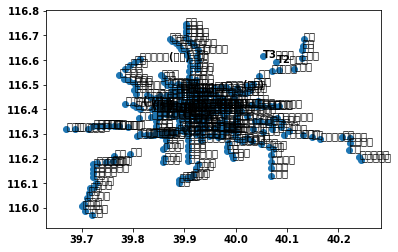

In [105]:
longitude_x = pd_post_geo_3['longitude'].tolist()
latitude_y = pd_post_geo_3['latitude'].tolist()
names = pd_post_geo_3['站点'].tolist()
fig, ax = plt.subplots()
ax.scatter(longitude_x, latitude_y )
for i, txt in enumerate(names):
    ax.annotate(txt, (longitude_x[i], latitude_y[i]))
#plt.scatter(, .tolist(), label='linear')

In [192]:
#exception line and change them
pd_post_geo_3[pd_post_geo_3['站点']=='欢乐谷景区']

,地铁,站点,拼音全拼,拼音首批,longitude,latitude,Unnamed: 6
143,7号线,欢乐谷景区,"huanleguyingou,huanyueyuyingqu,huanleyujingou,...","uyingou,huanyueguyingou,huanyueyujingou,huanle...",39.8665,116.500067,116.500067


In [23]:
pd_post_geo_3['longitude'][pd_post_geo_3['站点']=='欢乐谷景区'] = float(39.866505)

C:\hyapp\Anaconda_3_5_0_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
pd_post_geo_3['latitude'][pd_post_geo_3['站点']=='欢乐谷景区'] = float(116.500067)

C:\hyapp\Anaconda_3_5_0_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
#delete dulications
pd_post_geo_3 = pd_post_geo_3.drop('地铁',axis=1)
pd_post_geo_3 = pd_post_geo_3.drop_duplicates()
pd_post_geo_3.shape

(328, 6)

In [30]:
#chang longitude, latitude to float
pd_post_geo_3['longitude'] = pd.to_numeric(pd_post_geo_3['longitude'],errors='coerce')
pd_post_geo_3['latitude'] = pd.to_numeric(pd_post_geo_3['latitude'],errors='coerce')

In [31]:
# get the location of stations
location_geo_station_3 = dict(zip(pd_post_geo_3['站点'],zip(pd_post_geo_3['longitude'],pd_post_geo_3['latitude'])))
len(location_geo_station_3)

328

In [151]:
def get_geo_distance(station1,station2):
    return geo_distance(location_geo_station_3[station1],location_geo_station_3[station2])

In [152]:
get_geo_distance('东四', '灯市口')

0.8073204669782483

#  Get data from web page.

In [32]:
# get station station connection
url_2 = 'http://www.bjsubway.com/station/zjgls/'

In [33]:
html_2 = requests.get(url_2).content

In [36]:
from functools import reduce

In [37]:
from copy import deepcopy

df_list_2 = deepcopy(df_list)

# Preprocessing data from page source

In [38]:
#combine all the table
pd_all = pd.DataFrame()
for i in df_list_2:
    line_name = i.columns[0][0][0:3]
    #i.columns = reversed(list(i.columns.levels)[1].tolist())
    i.columns = ['起始/终到车站','区间距离（米)','方向']
    i['线路'] = [line_name]*i.shape[0]
    pd_all = pd_all.append(i,ignore_index=True)

In [40]:
# generate dictionary about the line number and the station distribute in it
pd_all['stop_pairs'] = pd_all['起始/终到车站'].str.split('――')
pd_stop_number = pd_all.groupby(['线路'])['stop_pairs'].apply(list).to_dict()

In [41]:
# generate dictionary about the station(key) and which line(line number)  it belongs to
from collections import defaultdict
pd_stop_number_dic = defaultdict(list)
pd_number_stop_dic = {key:list(set(reduce((lambda x,y: x+y),value))) for key, value in pd_stop_number.items()}
for key, values in pd_stop_number.items():
    for value in values:
        name_1 = value[1]
        name_2 = value[0]
        pd_stop_number_dic[name_1].append(key)
        pd_stop_number_dic[name_2].append(key)

pd_stop_number_dic = {key:list(set(value)) for key, value in pd_stop_number_dic.items()}

In [42]:
# generate a dictionary, key is staion to staion, value is connction distance  
stop_pairs_distance_dic = dict(zip(pd_all['起始/终到车站'],pd_all['区间距离（米)']))
pd_pairs = pd.DataFrame(pd_all['stop_pairs'].tolist(),columns= ['start_stop','next_stop'])
pd_all['终到/起始车站'] =  pd_pairs['next_stop'].map(str)  + '――' + pd_pairs['start_stop'].map(str)
stop_pairs_distance_dic.update(dict(zip(pd_all['终到/起始车站'],pd_all['区间距离（米)'])))


In [44]:
from collections import defaultdict

In [45]:
stops_connection = defaultdict(list)

In [46]:
pairs = pd_all['stop_pairs'].tolist()
for i in pairs:
    stops_connection[i[0]].append(i[1])
    stops_connection[i[1]].append(i[0])

In [47]:
stops_connection = {key:list(set(value)) for key,value in stops_connection.items()}
stops_connection_2 = defaultdict(list)
stops_connection_2.update(stops_connection)
stops_connection = stops_connection_2

In [48]:
#find those station whiout location and mannually add them
list_station_office = list(set(pd_pairs['start_stop'].tolist() + pd_pairs['next_stop'].tolist()))

In [88]:
len(list_station_office)

288

In [49]:
list_station_with_position_3 = list(location_geo_station_3.keys())

In [50]:
not_maped_position_3 = [i  for i in list_station_office if i not in list_station_with_position_3]
not_maped_position_3

['南八里庄', '陶然桥', '平乐园', '红庙', '北京西站', '高家园']

In [122]:
location_geo_station_3.update({'陶然桥':(39.8713,116.3878),'平乐园':(39.884,116.4773), '红庙':(39.9720,116.0542), 
                               '北京西站':(39.833683, 116.185651), '高家园': (39.9758, 116.4848), 
                               '南八里庄':(39.865012, 116.379008)})

# Build the search agent

In [131]:
#make network
city_graph = nx.Graph()

In [124]:
city_graph.add_nodes_from(stops_connection.keys())

In [125]:
%matplotlib inline

In [126]:
import matplotlib.pyplot as plt

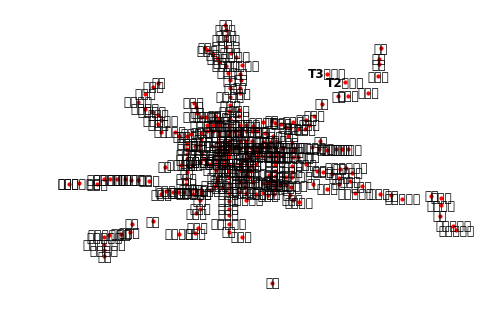

In [128]:
nx.draw(city_graph, location_geo_station_3, with_labels=True, node_size=10,font_family= 'DejaVu Sans')

In [129]:
#coonect network
city_with_road = nx.Graph(stops_connection)

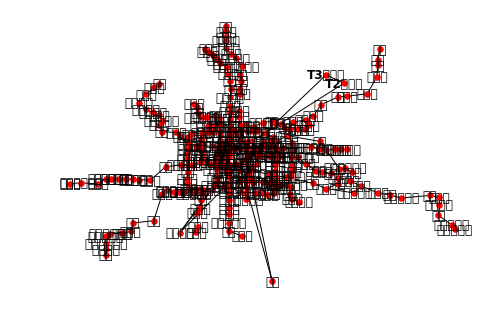

In [130]:
nx.draw(city_with_road, location_geo_station_3, with_labels=True, node_size=30)

In [217]:
def breath_first_search(stop_with_road,start):
    visited = [start]
    seen = set()
    while visited:
        frontier = visited.pop()
        if frontier in seen: continue
        if frontier not in stop_with_road.keys(): continue
        for related_stop in stop_with_road[frontier]:
            if related_stop in seen: continue
            visited = [related_stop] + visited
        seen.add(frontier)
    return seen

In [218]:
def search_local(start, destination, connection_map, stop_pairs_distance_dic,sort_way):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        pathes = [] if pathes is None else pathes
        temp_end = path[-1]
        if temp_end in visited: continue
        if temp_end not in connection_map.keys(): continue
        for stop in stops_connection[temp_end]:
            if stop in path: continue
            new_path = path + [stop]
            pathes.append(new_path)
            if stop == destination: return new_path
        visited.add(temp_end)
        pathes = sort_way(pathes,stop_pairs_distance_dic)    

In [219]:
def search_global(start, destination, connection_map):
    pathes = [[start]]
    final_path = []
    n = 0
    while pathes:
        n += 1
        path = pathes.pop(0)
        pathes = [] if pathes is None else pathes
        temp_end = path[-1]
        if temp_end not in connection_map.keys(): continue
        for stop in stops_connection[temp_end]:
            if stop in path: continue
            new_path = path + [stop]
            if stop == destination: 
                final_path.append(new_path)
            else:
                 pathes.append(new_path)
    return  final_path
     

In [220]:
def road_recommend(pathes,stop_pairs_distance_dic,pd_stop_number_dic):
    print('the pass least stops is ', '🚗->'.join(stops_pass_first_2(pathes)))
    print('the pass most stops is ', '🚗->'.join(stops_pass_as_much_possible_2(pathes)))
    print('the least distance is ', '🚗->'.join(shortest_path_distance_first_2(pathes,stop_pairs_distance_dic)))
    print('the least transfer is ', '🚗->'.join(least_transfer_2(pathes_2,pd_stop_number_dic)))

In [221]:
# those gobal one need a lot of time
#pathes_related = search_global('朝阳门','八宝山',stops_connection)

In [222]:
#road_recommend(pathes_related,stop_pairs_distance_dic,pd_stop_number_dic)

In [223]:
def stops_pass_first_2(pathes): 
    return sorted(pathes, key=len)[0]

In [224]:
def stops_pass_first(pathes,stop_pairs_distance_dic): 
    return sorted(pathes, key=len)

In [225]:
def stops_pass_as_much_possible_2(pathes):
    return sorted(pathes, key=len, reverse=True)[0]

In [226]:
def stops_pass_as_much_possible(pathes,stop_pairs_distance_dic):
    return sorted(pathes, key=len, reverse=True)

In [227]:
def shortest_path_distance_first_2(pathes,stop_pairs_distance_dic):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distance(path,stop_pairs_distance_dic):
        distance = 0
        for i in range(len(path)-1):
            name_stop1 = path[i]
            name_stop2 = path[i+1]
            distance_single = stop_pairs_distance_dic[name_stop1 + '――' + name_stop2]
            distance += int(distance_single)
        return distance

    return sorted(pathes, key=lambda path: get_path_distance(path,stop_pairs_distance_dic))[0]

In [228]:
def shortest_path_distance_first(pathes,stop_pairs_distance_dic):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distance(path,stop_pairs_distance_dic):
        distance = 0
        for i in range(len(path)-1):
            name_stop1 = path[i]
            name_stop2 = path[i+1]
            distance_single = stop_pairs_distance_dic[name_stop1 + '――' + name_stop2]
            distance += int(distance_single)
        return distance

    return sorted(pathes, key=lambda path: get_path_distance(path,stop_pairs_distance_dic))

In [229]:
def least_transfer_2(pathes,pd_stop_number_dic):
    
    if len(pathes) <= 1: return pathes
    
    def get_transfer_times(path,pd_stop_number_dic):
        times = 0
        for i in range(len(path)-1):
            name_stop1_number = pd_stop_number_dic[path[i]]
            name_stop2_number = pd_stop_number_dic[path[i+1]]
            if len(list(set(name_stop1_number).intersection(name_stop2_number))) == 0:
                times += 1
        return times

    return sorted(pathes, key=lambda path: get_transfer_times(path,pd_stop_number_dic) )[0]

In [230]:
def least_transfer(pathes,pd_stop_number_dic):
    
    if len(pathes) <= 1: return pathes
    
    def get_transfer_times(path,pd_stop_number_dic):
        times = 0
        for i in range(len(path)-1):
            name_stop1_number = pd_stop_number_dic[path[i]]
            name_stop2_number = pd_stop_number_dic[path[i+1]]
            if len(list(set(name_stop1_number).intersection(name_stop2_number))) == 0:
                times += 1
        return times

    return sorted(pathes, key=lambda path: get_transfer_times(path,pd_stop_number_dic) )

In [232]:
def pretty_print(stops):
    print('🚗->'.join(stops))

In [233]:
pretty_print(search_local('朝阳门','八宝山',stops_connection, stop_pairs_distance_dic, sort_way = stops_pass_first))

朝阳门🚗->东四🚗->南锣鼓巷🚗->北海北🚗->平安里🚗->车公庄🚗->车公庄西🚗->白石桥南🚗->白堆子🚗->军事博物馆🚗->公主坟🚗->万寿路🚗->五棵松🚗->玉泉路🚗->八宝山


In [234]:
#search('朝阳门','八宝山',stops_connection, stop_pairs_distance_dic, sort_way = shortest_path_first)
pretty_print(search_local('朝阳门','八宝山',stops_connection, stop_pairs_distance_dic, sort_way = stops_pass_as_much_possible))

朝阳门🚗->建国门🚗->东单🚗->王府井🚗->天安门东🚗->天安门西🚗->西单🚗->复兴门🚗->南礼士路🚗->木樨地🚗->军事博物馆🚗->公主坟🚗->万寿路🚗->五棵松🚗->玉泉路🚗->八宝山


In [235]:
pretty_print(search_local('朝阳门','八宝山',stops_connection, pd_stop_number_dic, sort_way = least_transfer))

朝阳门🚗->东四🚗->南锣鼓巷🚗->北海北🚗->平安里🚗->车公庄🚗->车公庄西🚗->白石桥南🚗->白堆子🚗->军事博物馆🚗->公主坟🚗->万寿路🚗->五棵松🚗->玉泉路🚗->八宝山


In [236]:
start  = '三元桥'
end = '纪家庙'

In [237]:
pretty_print(search_local(start,end,stops_connection, pd_stop_number_dic, sort_way = stops_pass_first))

三元桥🚗->东直门🚗->东四十条🚗->朝阳门🚗->建国门🚗->东单🚗->崇文门🚗->前门🚗->和平门🚗->宣武门🚗->菜市口🚗->陶然亭🚗->北京南站🚗->马家堡🚗->角门西🚗->草桥🚗->纪家庙


In [238]:
pretty_print(search_local(start,end,stops_connection, pd_stop_number_dic, sort_way = stops_pass_as_much_possible))

三元桥🚗->太阳宫🚗->芍药居🚗->惠新西街南口🚗->惠新西街北口🚗->大屯路东🚗->北苑路北🚗->立水桥南🚗->立水桥🚗->霍营🚗->回龙观东大街🚗->平西府🚗->育知路🚗->朱辛庄🚗->生命科学园🚗->西二旗🚗->上地🚗->五道口🚗->知春路🚗->知春里🚗->海淀黄庄🚗->人民大学🚗->魏公村🚗->国家图书馆🚗->动物园🚗->西直门🚗->车公庄🚗->阜成门🚗->复兴门🚗->南礼士路🚗->木樨地🚗->军事博物馆🚗->公主坟🚗->莲花桥🚗->六里桥🚗->六里桥东🚗->北京西站🚗->湾子🚗->达官营🚗->广安门内🚗->菜市口🚗->宣武门🚗->和平门🚗->前门🚗->崇文门🚗->北京站🚗->建国门🚗->东单🚗->王府井🚗->天安门东🚗->天安门西🚗->西单🚗->灵境胡同🚗->西四🚗->平安里🚗->北海北🚗->南锣鼓巷🚗->东四🚗->张自忠路🚗->北新桥🚗->雍和宫🚗->东直门🚗->东四十条🚗->朝阳门🚗->东大桥🚗->呼家楼🚗->金台路🚗->红庙🚗->大望路🚗->国贸🚗->双井🚗->广渠门外🚗->广渠门内🚗->磁器口🚗->天坛东门🚗->蒲黄榆🚗->刘家窑🚗->宋家庄🚗->石榴庄🚗->大红门🚗->角门东🚗->角门西🚗->草桥🚗->纪家庙


In [239]:
pretty_print(search_local(start,end,stops_connection, stop_pairs_distance_dic, sort_way = shortest_path_distance_first))

三元桥🚗->东直门🚗->东四十条🚗->朝阳门🚗->建国门🚗->北京站🚗->崇文门🚗->前门🚗->和平门🚗->宣武门🚗->菜市口🚗->陶然亭🚗->北京南站🚗->马家堡🚗->角门西🚗->草桥🚗->纪家庙


In [1]:
pretty_print(search_local(start,end,stops_connection, pd_stop_number_dic, sort_way = least_transfer))

NameError: name 'pretty_print' is not defined

# 比较

官网》
朝阳门 🚗-> 建国门 🚗-> 东单 🚗-> 王府井 🚗-> 天安门东 🚗-> 天安门西 🚗-> 西单 🚗-> 复兴门 🚗-> 南礼士路 🚗-> 木樨地 🚗-> 军事博物馆 🚗-> 公主坟 🚗-> 万寿路 🚗->五棵松 🚗->玉泉路 


我们》 
朝阳门🚗->东四🚗->南锣鼓巷🚗->北海北🚗->平安里🚗->车公庄🚗->车公庄西🚗->白石桥南🚗->白堆子🚗->
军事博物馆🚗->公主坟🚗->万寿路🚗->五棵松🚗->玉泉路🚗->八宝山

主要我们是局部最优，当选择第一条站点后，就不再考虑其他的。其实，开始排序次位置， 后面也许会变好， 但是按照我们的方法，就完全搜索不到了。